# Kelompok 5

# Import Library

In [29]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Inisiasi Dataset - Preprocessing

In [30]:
Ravdess = "Dataset/RAVDESS/"
ravdess_directory_list = os.listdir(Ravdess)

### Menambahkan emosi, path, dan gender kedalam data frame

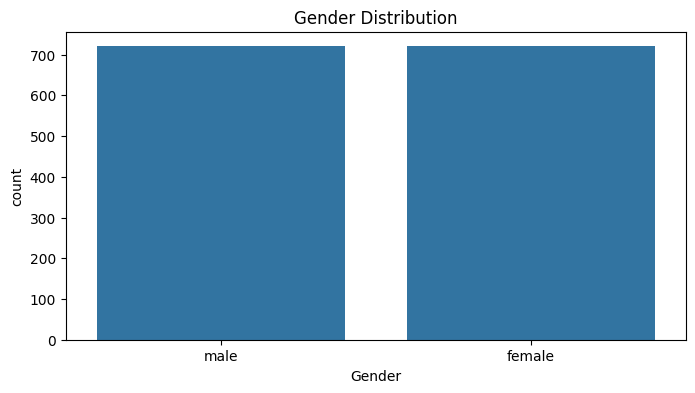

Emotions                                               Path Gender
0  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav   male
1  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-01-02-01.wav   male
2  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav   male
3  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-02-02-01.wav   male
4     calm  Dataset/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav   male

In [31]:
file_emotion = []
file_path = []
file_gender = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        # Determine gender from actor number
        actor_number = int(dir.split('_')[-1])
        if actor_number % 2 == 0:
            file_gender.append('female')
        else:
            file_gender.append('male')

# Create DataFrame for emotions, paths, and gender
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
gender_df = pd.DataFrame(file_gender, columns=['Gender'])

Ravdess_df = pd.concat([emotion_df, path_df, gender_df], axis=1)
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Plot the gender distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=Ravdess_df)
plt.title('Gender Distribution')
plt.show()

Ravdess_df.head()

### Membuat DataFrame ke csv

In [32]:
# creating Dataframe to csv
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path Gender
0  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav   male
1  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-01-02-01.wav   male
2  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-02-01-01.wav   male
3  neutral  Dataset/RAVDESS/Actor_01/03-01-01-01-02-02-01.wav   male
4     calm  Dataset/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav   male

### Menghitung Dataset

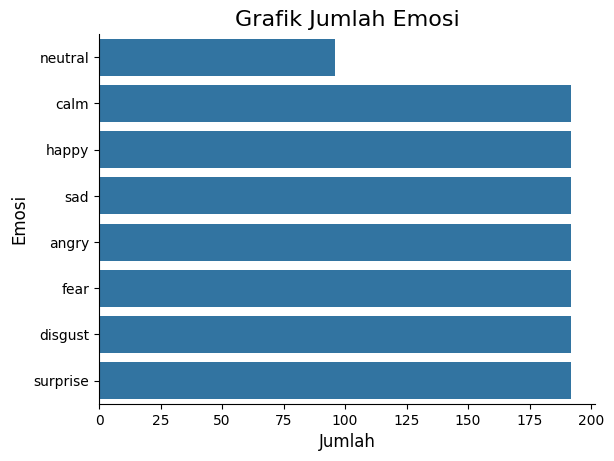

Detail Jumlah Emosi:
 Emotions
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64

Jumlah Total Emosi: 1440


In [33]:
plt.title('Grafik Jumlah Emosi', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Emosi', size=12)
plt.xlabel('Jumlah', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Print the total count of each emotion
total_emosi = data_path['Emotions'].value_counts()
print("Detail Jumlah Emosi:\n", total_emosi)

# Sum up all the total counts of the emotions
sum_total_emosi = total_emosi.sum()
print(f"\nJumlah Total Emosi: {sum_total_emosi}")

### Tampilkan contoh audio dari dataset

In [34]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram untuk audio dengan emosi {}'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

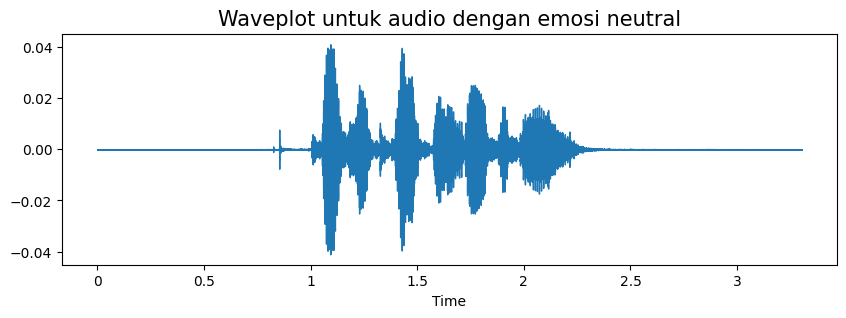

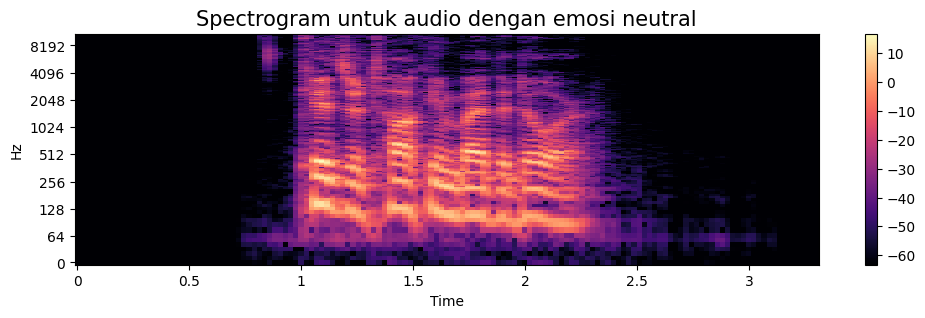

In [35]:
# Assuming Ravdess_df and data_path are already defined and have the correct format
emotion = 'neutral'  # Example emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

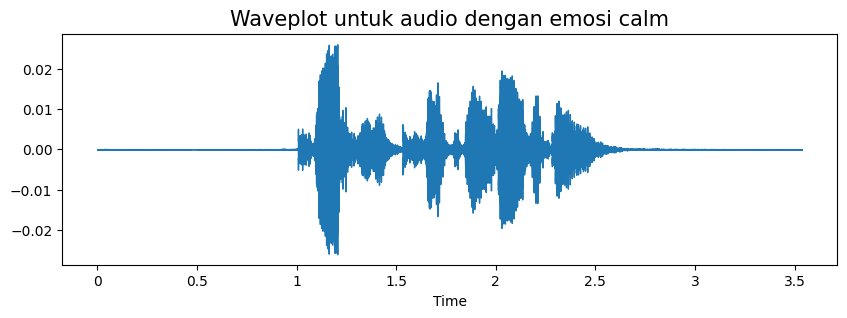

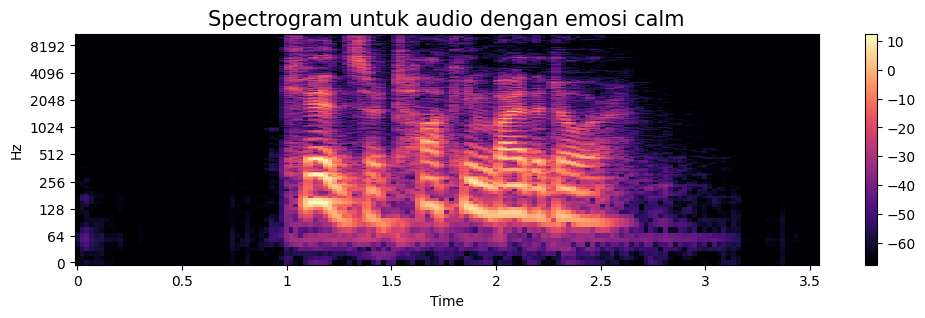

In [36]:
emotion = 'calm'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

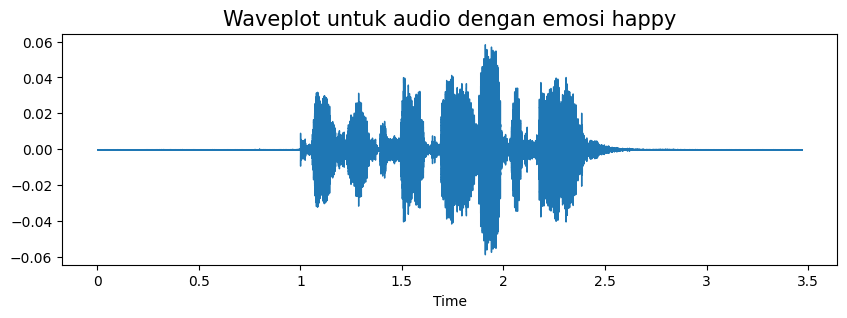

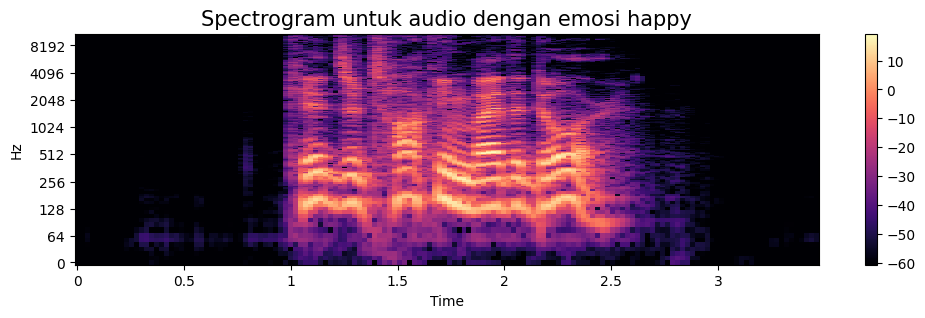

In [37]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

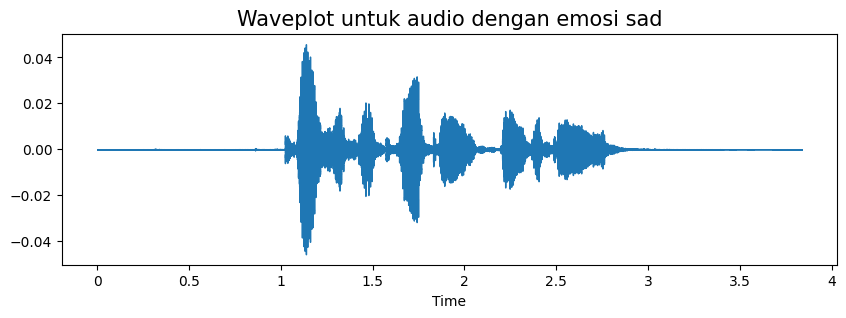

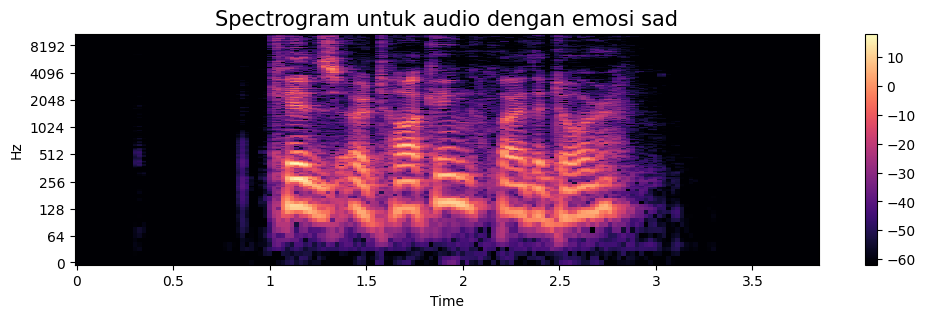

In [38]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

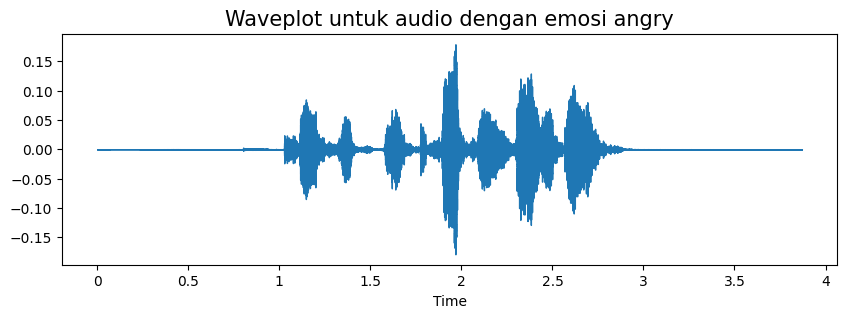

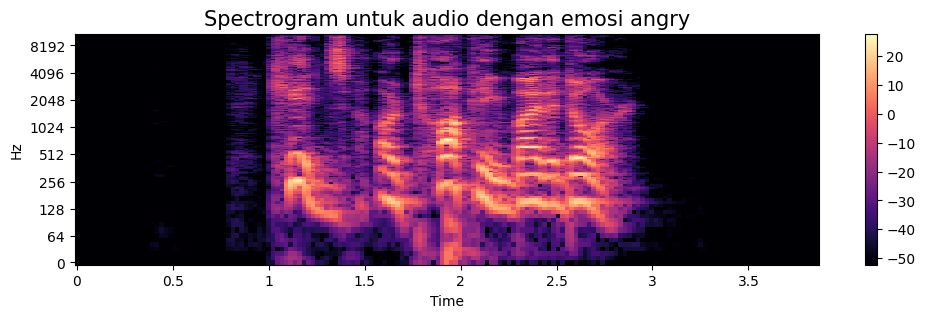

In [39]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

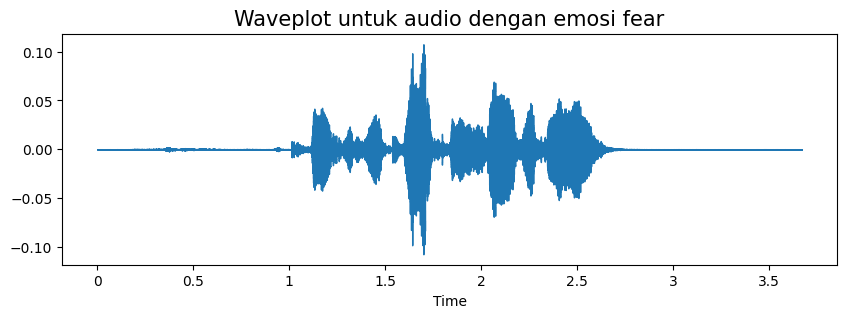

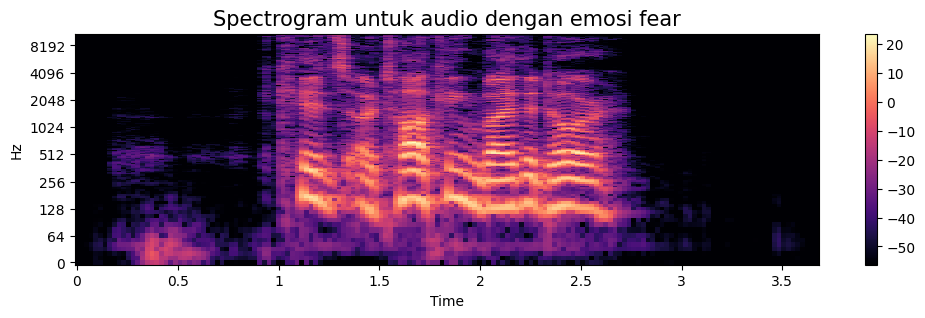

In [40]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

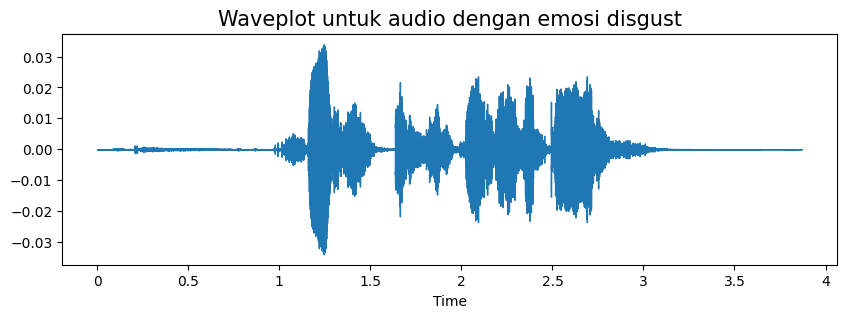

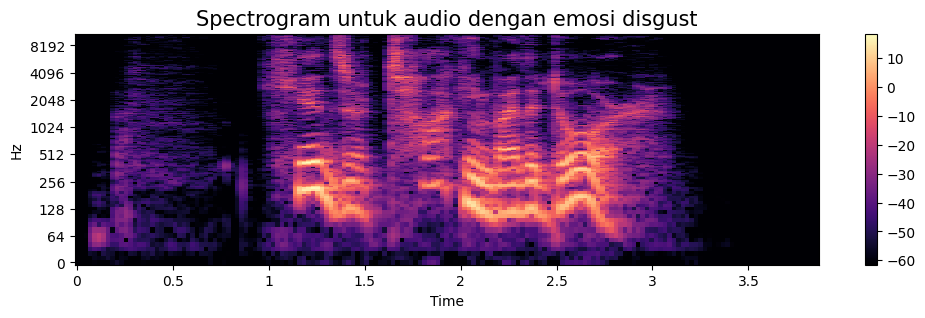

In [41]:
emotion = 'disgust'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

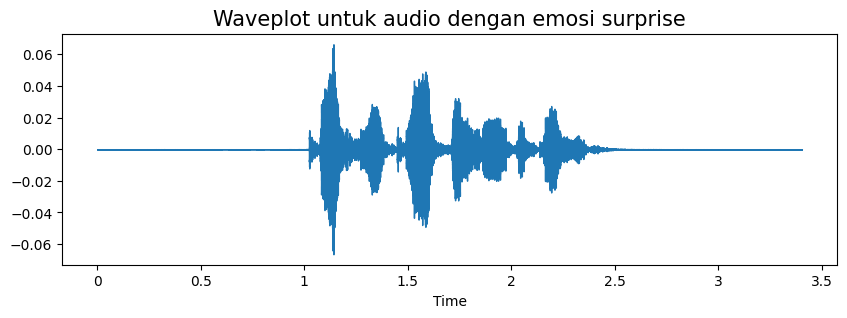

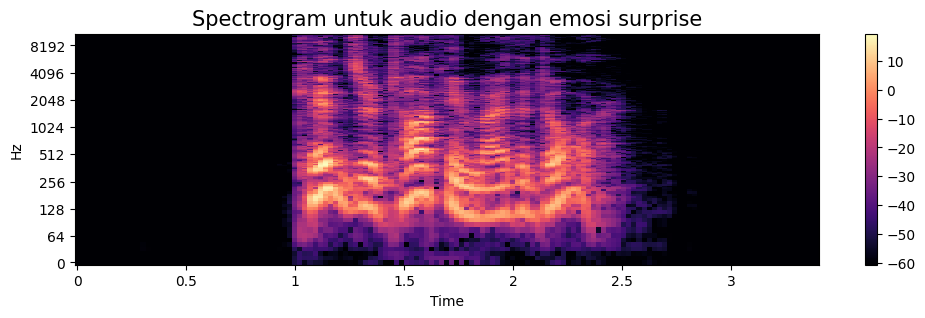

In [42]:
emotion = 'surprise'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Augmentasi (Masih Preprocessing)
Dengan menambahkan noise, stretch (menambah durasi), shift, dan pitch (mengubah frekuensi tinggi/rendah)

In [43]:
# Load the data path CSV file
data_path_csv = 'data_path.csv'
data_path = pd.read_csv(data_path_csv)

# Define the augmentation functions
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Taking an example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

### Contoh audio yang akan di augmentasi

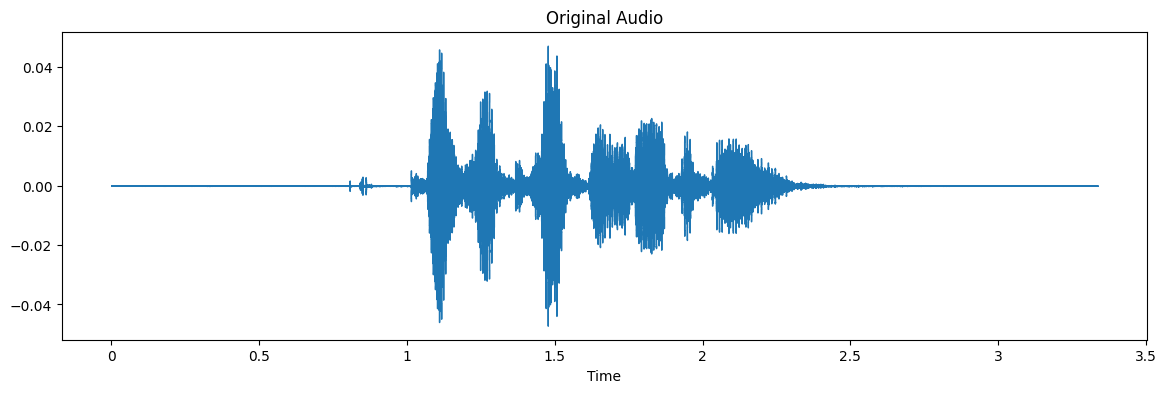

In [44]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title('Original Audio')
plt.show()

# Play the original audio
display(Audio(data, rate=sample_rate))

### Noise

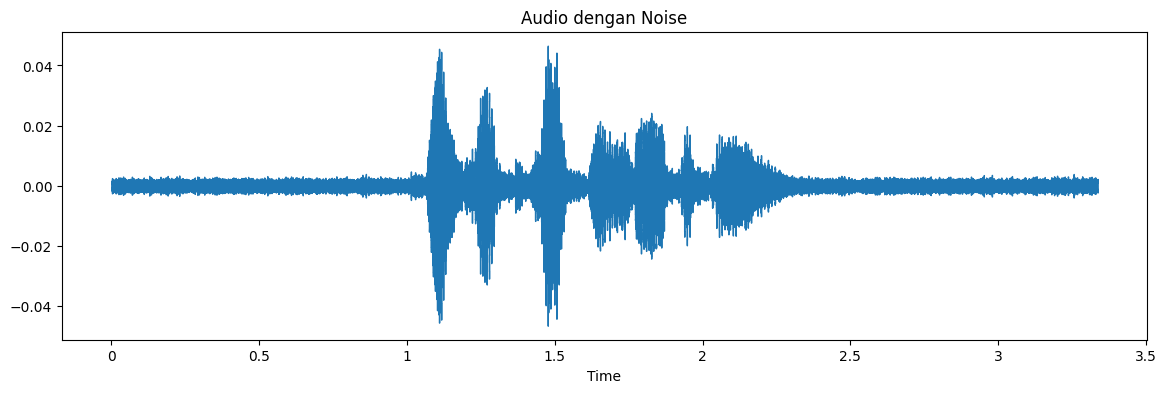

In [45]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Audio dengan Noise')
plt.show()

display(Audio(x, rate=sample_rate))


### Stretching

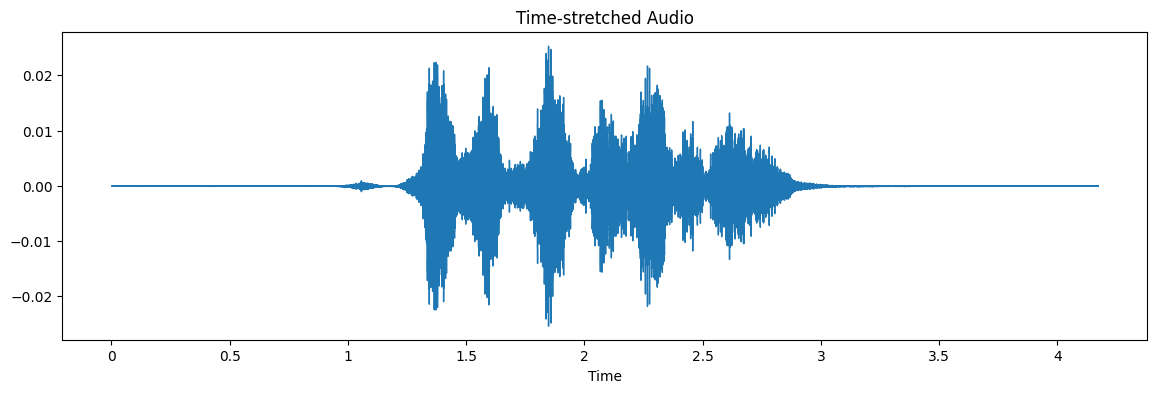

In [46]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Time-stretched Audio')
plt.show()

display(Audio(x, rate=sample_rate))

### Shifting 

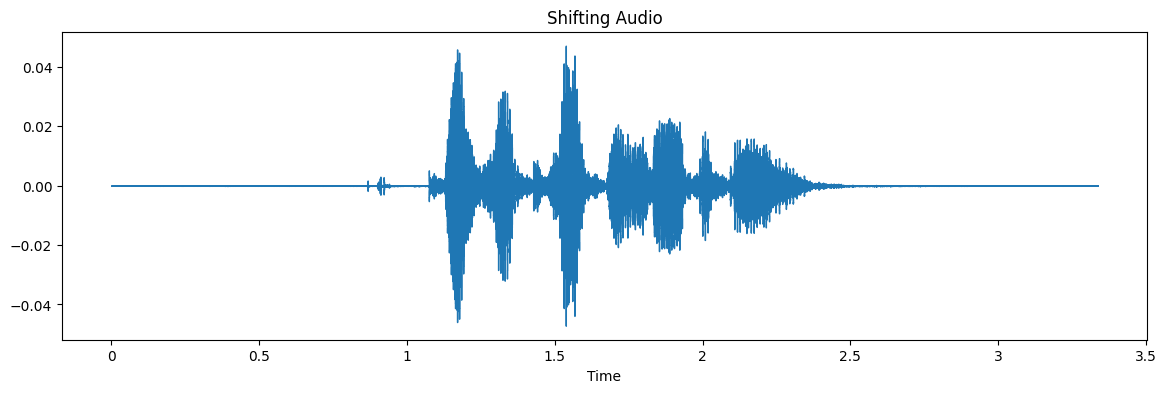

In [47]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Shifting Audio')
plt.show()

display(Audio(x, rate=sample_rate))

### Pitch

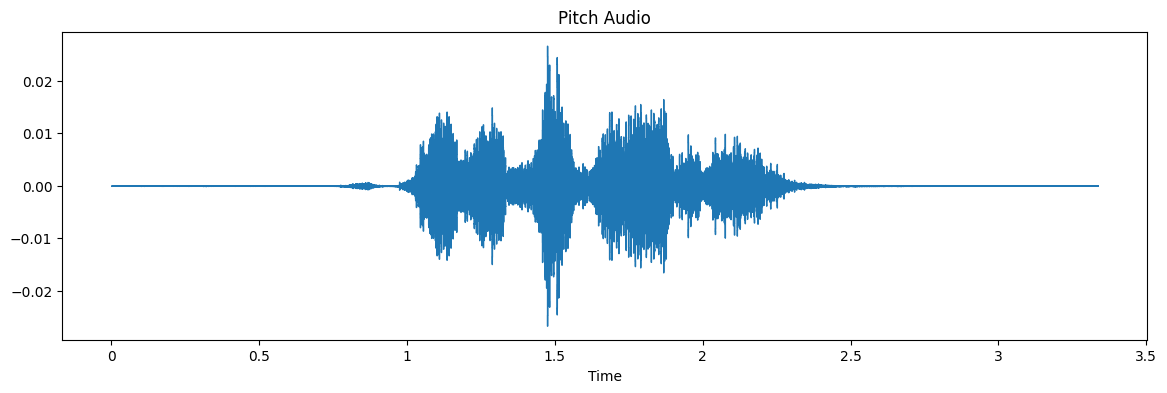

In [48]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Pitch Audio')
plt.show()

display(Audio(x, rate=sample_rate))

# Ekstraksi Fitur

In [49]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [50]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [51]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [52]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.327343  0.833838  0.841271  0.821535  0.825048  0.804675  0.693329   
2  0.188227  0.622132  0.699217  0.753340  0.721217  0.701731  0.682358   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.338998  0.802358  0.832450  0.816055  0.808310  0.807163  0.721586   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.703933  0.746585  0.776469  ...  1.039741e-04  1.005691e-04   
2  0.662839  0.686496  0.733970  ...  8.579046e-07  9.576654e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.669567  0.713960  0.752190  ...  1.550618e-04  1.622622e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116492e-06  8.190282e-06  0.000007  0.000005   
1  9.663760e-05  9.769602e-05  9.314547e-05  1.026190e-04  0.000105  0.000099   
2  7.733597e-07  5.233100e-07  3.593209e-07  9.263777e-07  0.000002  0.000001   
3  6.654922e-06  6.979548e-06  1.214236e-05  9.640185e-06  0.000011  0.000006   
4  1.609535e-04  1.570697e-04  1.605114e-04  1.684147e-04  0.000168  0.000157   

            161   labels  
0  4.245834e-07  neutral  
1  9.152834e-05  neutral  
2  7.753991e-08  neutral  
3  4.254087e-07  neutral  
4  1.460601e-04  neutral  

[5 rows x 163 columns]

# Mempersiapkan Data
Split train, test, val

# Modelling
CNN